<i><b>Public AI</b></i>
<br>
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 2. CNN Basis**
# Section 2. Padding & Strides

### _Objective_

1. 합성곱 연산 전후 특징맵의 크기를 보존해주는 패딩에 대해 배워보도록 하겠습니다.<br>
2. 합성곱 연산량을 줄여주는 스트라이드(Stride)에 대해 배워보도록 하겠습니다.
  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model

<br><br>

# \[ 1. 패딩이란 \]

----

----

> *합성곱 연산을 거치게 되면, 특징맵의 크기는 약간씩 줄게 됩니다.*<br>
> *패딩은 합성곱 연산을 거치더라도, 특징맵의 크기가 줄어들지 않도록 만듭니다.*<br>


<br>

## 1. 합성곱 연산의 문제점 : 크기의 축소
----

합성곱 연산을 적용할 경우, 특징맵의 가장자리 부분은 연산에서 제외되기 때문에<br>
약간씩 줄어들게 됩니다.

![Imgur](https://i.imgur.com/gBUh9dG.png)

In [2]:
image = np.zeros((10, 10),dtype=np.uint8)
image[:,:5] = 10
res_image = image.reshape(1,10,10,1)

print("Before Feature Map size :",image.shape)

# Sobel Filter를 이용
v_sobel = np.array([[1,0,-1], 
                    [2,0,-2], 
                    [1,0,-1]]) 

# 위 필터를 사용하여 image와 filter간의 convolution 연산을 keras를 사용해 진행해주세요
# fix me!

print("After Feature Map size :",result.shape)

Before Feature Map size : (10, 10)
After Feature Map size : (8, 8)


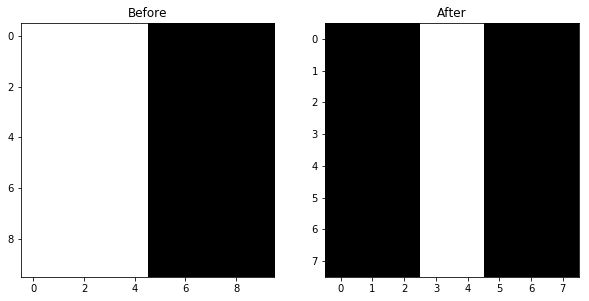

In [3]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1)
ax.set_title('Before')
ax.imshow(image, cmap='gray')

ax = fig.add_subplot(1,2,2)
ax.set_title('After')
ax.imshow(result, cmap='gray')
plt.show()

<br>

## 2. Zero Padding 적용
---

합성곱 연산을 할때마다 조금씩 이미지의 크기가 줄어듭니다.<br>
이는 크게 2가지 문제를 유발합니다.<br>

1. 깊게 쌓으면 이미지의 크기가 지나치게 작아지게 됨 <br>
2. 가장자리의 정보가 계속 유실되게 됨 <br>

이러한 문제를 해결하기 위해, 가장자리에 이미지를 덧대주는 작업을 거치게 됩니다.<br>

In [4]:
print("Before Feature Map size :",image.shape)
image_with_pad = np.pad(image,[[1,1],[1,1]],mode='constant')
print("After padding size :",image_with_pad.shape)

# sobel Filter를 이용
v_sobel = np.array([[1,0,-1], 
                    [2,0,-2], 
                    [1,0,-1]]) 

# 위 필터를 사용하여 padding이 진행된 image와 filter간의 convolution 연산을 keras를 사용해 진행해주세요
# fix me!

print("After Feature Map size :",result.shape)

Before Feature Map size : (10, 10)
After padding size : (12, 12)
After Feature Map size : (8, 8)


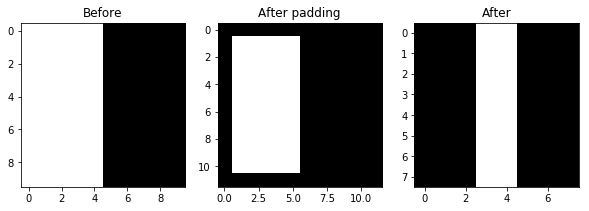

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,3,1)
ax.set_title('Before')
ax.imshow(image, cmap='gray')

ax = fig.add_subplot(1,3,2)
ax.set_title('After padding')
ax.imshow(image_with_pad, cmap='gray')

ax = fig.add_subplot(1,3,3)
ax.set_title('After')
ax.imshow(result, cmap='gray')
plt.show()

Input과 Output의 크기가 동일합니다.<br>
작은 이미지에서는 패딩에 의해, 결과가 약간씩 왜곡되지만, 실제로 대부분 이미지에서<br>
패딩으로 인한 왜곡 현상은 무시할 수 있을 만큼 작습니다.

<br>

## 3. 패딩의 크기 결정
---
Keras(Tensorflow) 에서도 Convolution 에 padding 을 쉽게 적용 가능합니다. 

Keras(Tensorflow) 에서 사용되는 padding 알고리즘은 2가지 방법이 있습니다. 

1. VALID :  패딩을 붙이지 않습니다. Window 에 Kernel 의 사이즈 보다 적은 데이터 셋이 있다면 Convolution 연산을 수행하지 않습니다. 


![Imgur](https://i.imgur.com/uVU6FlS.png)
    
2. SAME : Convoluiton 연산을 수행하기 위해 이미지에 padding 을 붙입니다.  Window 에 Kernel 의 사이즈 보다 적은 데이터 셋이 있다면 padding 을 붙여 Convolution 을 수행합니다.

![Imgur](https://i.imgur.com/gBvXhZw.png)

### (1) SAME 시 패딩의 크기를 결정하기

출력의 크기는 아래와 같이 결정됩니다.<br>
$
n_{out} = n_{in}+2p-k +1\\
-------------\\
n_{in} : \mbox{number of input features}\\
n_{out} : \mbox{number of output features}\\
k : \mbox{convolution kernel size}\\
p : \mbox{convolution padding size}\\
$

출력의 크기와 입력의 크기가 동일하게 만들어주기 위해서는<br>
패딩의 크기가 아래와 같아져야 합니다.<br>
$
p = \frac{k-1}{2}
$

### (2) 필터의 크기

필터의 크기는 홀수 입니다. 그 이유는 두가지로,
1. 패딩이 비대칭이 됩니다. 
   홀수 일 때 합성곱에서 동일한 크기로 패딩을 더해줄 수 있고, 짝수면 왼쪽과 오른쪽을 다르게 패딩해야 하기 때문에 번거롭습니다.
2. 필터의 크기가 홀수가 되어야 중심 픽셀이 잡힙니다. 이러한 개념들은<br>
기존 컴퓨터 비전에서 필터를 설계할 때의 관습입니다.

## 4 Conv2D 함수에 padding 적용하기 

`tensorflow.keras.layers.Conv2D` 함수에 `same`, `valid` padding 알고리즘을 적용하는 법을 배워보고 결과를 확인합니다. 

default 값은 `valid` 로 되어 있습니다
![Imgur](https://i.imgur.com/RNsXx9O.png)



### Padding type : Valid 

In [6]:
image = np.zeros((10, 10),dtype=np.uint8)
image[:,:5] = 10
res_image = image.reshape(1,10,10,1)

print("Before Feature Map size :",image.shape)

# Sobel Filter를 이용
v_sobel = np.array([[1,0,-1], 
                    [2,0,-2], 
                    [1,0,-1]])

# 위 필터를 사용하여 image와 filter간의 convolution 연산을 keras를 사용해 진행해주세요
# Conv2D의 padding 인자를 'valid'로 조정해주세요
# fix me!

print("(Padding : valid) After Feature Map size :",result.shape)

Before Feature Map size : (10, 10)
(Padding : valid) After Feature Map size : (8, 8)


### Padding type : same 

In [7]:
image = np.zeros((10, 10),dtype=np.uint8)
image[:,:5] = 10
res_image = image.reshape(1,10,10,1)

print("Before Feature Map size :",image.shape)

# Sobel Filter를 이용
v_sobel = np.array([[1,0,-1], 
                    [2,0,-2], 
                    [1,0,-1]])

# 위 필터를 사용하여 image와 filter간의 convolution 연산을 keras를 사용해 진행해주세요
# Conv2D의 padding 인자를 'same'으로 조정해주세요
# fix me!

print("(Padding : same) After Feature Map size :",result.shape)


Before Feature Map size : (10, 10)
(Padding : same) After Feature Map size : (10, 10)


<br><br>

# \[ 2. 스트라이드란 \]

----

----

> Window 는 Image 에 filter 가 적용되는 공간을 의미 합니다. <br>
> *stride는 window의 이동 간격을 뜻합니다.*<br>
> *기존의 필터는 한칸씩 이동했다면, stride가 1보다 클 경우, 그 수 만큼 필터가 이동하게 됩니다.*<br>


## 1. 스트라이드 적용하기
----

In [8]:
stride = 2
tf.reset_default_graph()
image = np.zeros((10, 10),dtype=np.uint8)
image[:,:5] = 10
res_image = image.reshape(1,10,10,1)

print("Before Feature Map size :",image.shape)

# Sobel Filter를 이용
v_sobel = np.array([[1,0,-1], 
                    [2,0,-2], 
                    [1,0,-1]]) 
res_v_sobel = v_sobel.reshape(3,3,1,1)

# 위 필터를 사용하여 image와 filter간의 convolution 연산을 keras를 사용해 진행해주세요
# Conv2D의 strides 인자를 '(2,2)'로 조정해주세요
# 이는 Height 방향 (axis=0) 으로 2칸 , Width 방향 (axis=1) 으로 2칸씩 이동한다는 뜻입니다
# fix me!

print("(Padding : same) After Feature Map size :",result.shape)


plt.imshow(result,cmap='gray')
plt.show()

AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'

크기는 줄였지만, 전체적인 형태는 (10,10)일 때와 현재와 동일합니다.<br>
Stride를 거치면, 스트라이드의 제곱수만큼 연산 수가 줄어들게 됩니다.<br>

큰 이미지의 경우 주위 값들의 차이가 큰 영향을 못미칠 경우가 많고,<br>
어느정도 중복이 될수있어서 stride를 주더라도 성능 저하가 크게 발생하진 않습니다.

## 2. 스트라이드가 있었을 때의 출력 특징 맵의 크기
----

스트라이드를 통한 출력 특징 맵의 크기는 아래와 같이 변하게 됩니다.

$
n_{out} = \lfloor \frac{n_{in}+2p-k}{s}\rfloor +1\\
-------------\\\
n_{in} : \mbox{number of input features}\\
n_{out} : \mbox{number of output features}\\
k : \mbox{convolution kernel size}\\
p : \mbox{convolution padding size}\\
s : \mbox{convolution stride size}\\
$


## 3. Same padding일 때의 패딩 크기 결정
----

이때 Same padding인 경우, 출력 특징 맵의 크기는 아래와 같게 됩니다.<br>
$
\lfloor n_{out} \rfloor = \lfloor \frac{n_{in}}{s} \rfloor
$<br>
출력 특징 맵의 크기가 위의 값이 될 수 있도록, padding의 크기를 결정하게 됩니다.<br>
$
\lfloor \frac{n_{in}}{s} \rfloor = \lfloor \frac{n_{in}+2p-k}{s}\rfloor +1\\
$

---
⊙ Copyright(c) 2020 by PublicAI. All rights reserved <br>
All pictures, codes, writings cannot be copied without permission. <br>
Writen by PAI(info@publicai.co.kr) <br>
last updated on 2020/01/4 <br>

---